Statistical summary:
         Accuracy  ReactionTime
count   16.000000     16.000000
mean    86.412500      1.746250
std     14.847261      0.472721
min     53.800000      1.080000
25%     76.725000      1.340000
50%     92.850000      1.720000
75%     97.950000      2.005000
max    100.000000      2.780000


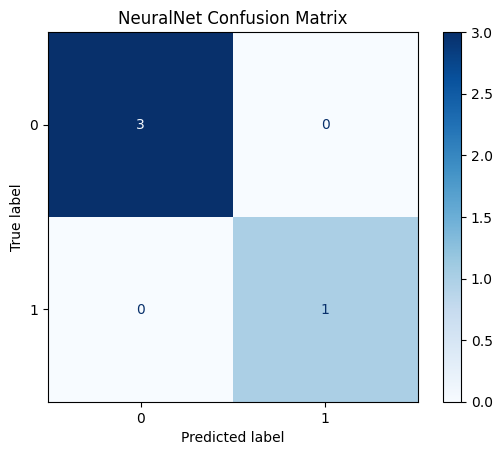

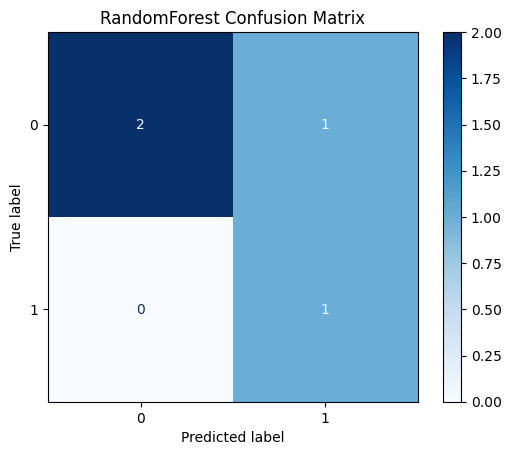

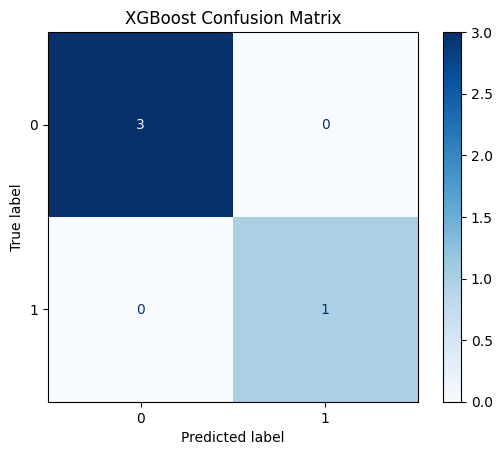

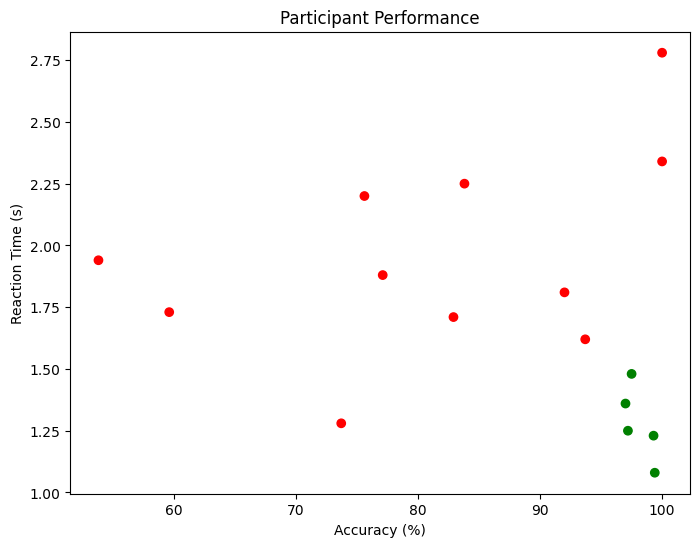

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

use_xgb = True

try:
    from xgboost import XGBClassifier
except ImportError:

    use_xgb = False

    print("XGBoost not installed. Skipping it.")

data = pd.DataFrame({
    'Participant': list(range(1, 17)),

    'Accuracy': ['82.90%', '99.30%', '93.70%', '83.80%', '100%', '73.70%', '97.50%', '99.40%',
                 '100%', '77.10%', '75.60%', '92%', '97%', '97.20%', '53.80%', '59.60%'],

    'ReactionTime': ['1.71s','1.23s','1.62s','2.25s','2.78s','1.28s','1.48s','1.08s',
                     '2.34s','1.88s','2.20s','1.81s','1.36s','1.25s','1.94s','1.73s']
})

data['Accuracy'] = data['Accuracy'].str.rstrip('%').astype(float)

data['ReactionTime'] = data['ReactionTime'].str.rstrip('s').astype(float)

acc_threshold = 90

time_threshold = 1.5

def assign_label(row):
    if row['Accuracy'] >= acc_threshold and row['ReactionTime'] <= time_threshold:
        return 1
    else:
        return 0

data['Label'] = data.apply(assign_label, axis=1)

print("Statistical summary:")
print(data[['Accuracy', 'ReactionTime']].describe())

X = data[['Accuracy', 'ReactionTime']]
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'NeuralNet': MLPClassifier(hidden_layer_sizes=(10,5), max_iter=1000, random_state=42),

    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

if use_xgb:
    
    models['XGBoost'] = XGBClassifier(eval_metric='logloss', random_state=42)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.savefig(f"Confusion_Matrix_{name}.jpg")
    plt.show()
    plt.close()

plt.figure(figsize=(8,6))
colors = data['Label'].map({0:'red', 1:'green'})
plt.scatter(data['Accuracy'], data['ReactionTime'], c=colors)
plt.xlabel('Accuracy (%)')
plt.ylabel('Reaction Time (s)')
plt.title('Participant Performance')
plt.savefig('Data_Visualize.jpg')
plt.show()
